## 로시스틱 회귀
- classification(분류) 작업

#### 이진분류
- sigmoid 함수

$H(x) = sigmoid(Wx + b) = \frac{1}{1 + e^{(Wx + b)}} = \sigma(Wx + b)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

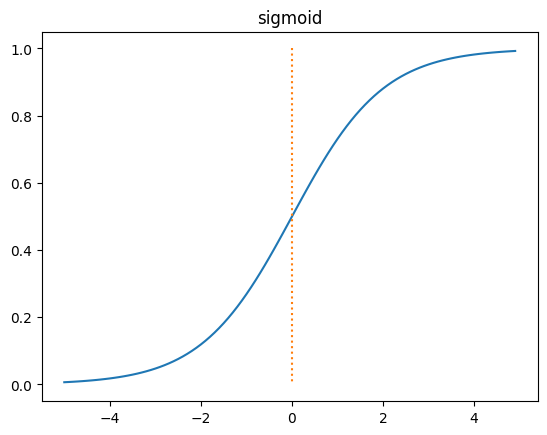

In [5]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,0.0], ':')
plt.title("sigmoid")
plt.show()

#### W값의 변화에 따른 경사도 변화

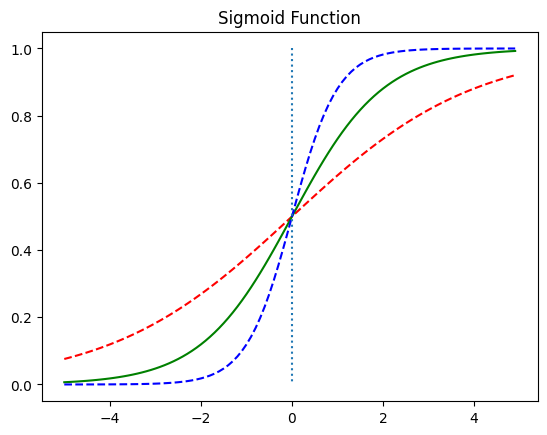

In [7]:
x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

#### b값에 따른 좌,우 이동

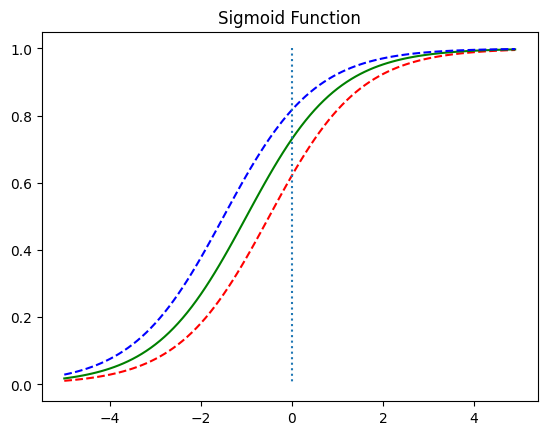

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

#### sigmoid함수를 사용할 때의 손실함수
- 평균 제곱 오차 사용 시:
    - 평균 제곱 오차: 
    $cost(W,b) = \frac{1}{N}\displaystyle\sum_{t=1}^{N}{(y_i - H(x^{(i)}))^{2}}$
    $H(x) = sigmoid(Wx + b)$
    
    - cost함수를 미분 시 심한 비볼록(non-convex)형태의 그래프 
    -> 로컬 미니멈이 글로벌 미니멈이 아닐 수 있음

    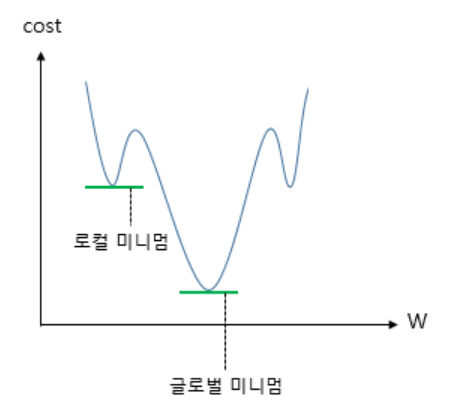

    $if y=1 -> cost(H(x),y) = 1 = -log(H(x))$

    $if y=0 -> cost(H(x),y) = \infin = -log(1-H(x))$

    따라서 최종 손실 함수:

    $cost(H(x),y) = -[ylogH(x) + (1-y)log(1-H(x))]$

## 예제

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [10]:
torch.manual_seed(1)

In [11]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [13]:
x_train.shape, y_train.shape

(torch.Size([6, 2]), torch.Size([6, 1]))

In [12]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [15]:
# hypothesis = 1/(1+torch.exp(-(x_train.matmul(W)+b)))
hypothesis = torch.sigmoid(x_train.matmul(W)+b)

In [21]:
loss = -(y_train * torch.log(hypothesis) + (1-y_train) * torch.log(1-hypothesis))
print(loss)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [22]:
cost = loss.mean()
print(cost)
print(F.binary_cross_entropy(hypothesis, y_train))

tensor(0.6931, grad_fn=<MeanBackward0>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)


In [19]:
optimizer = optim.SGD([W, b], lr=1)
epochs = 1000

In [23]:
for epoch in range(epochs):
    hypothesis = torch.sigmoid(x_train.matmul(W)+b)
    cost = F.binary_cross_entropy(hypothesis, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, epochs, cost.item()
        ))


Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888


In [24]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b)
hypothesis

tensor([[2.7711e-04],
        [3.1636e-02],
        [3.9014e-02],
        [9.5618e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)

In [25]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


#### nn.Module과 클래스로 구현

In [33]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [26]:
model = nn.Sequential(
   nn.Linear(2, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

In [28]:
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [27]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [34]:
optimizer = optim.SGD(model.parameters(), lr=1)

for epoch in range(epochs):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083805 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00